In [8]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

In [10]:
data = pd.read_csv('housing.csv')

In [11]:
print(data.info())
print(data.describe())
print(" ")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [12]:
X = data.drop('median_house_value', axis=1)

X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

X = X.dropna()

In [13]:
y =data['median_house_value']
y = y[X.index]

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
# Print the shapes of the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (12259, 12), (12259,)
Validation set: (4087, 12), (4087,)
Test set: (4087, 12), (4087,)


In [16]:
medium_nn = Sequential(
    [
        Input(shape=(12,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ]
)

optimizer = Adam(learning_rate=0.1)
cp = ModelCheckpoint('models/medium_nn.keras', save_best_only=True)
medium_nn.compile(optimizer=optimizer, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22939494400.0000 - root_mean_squared_error: 149545.1406 - val_loss: 9734004736.0000 - val_root_mean_squared_error: 98661.0625
Epoch 2/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10320687104.0000 - root_mean_squared_error: 101574.2500 - val_loss: 8629359616.0000 - val_root_mean_squared_error: 92894.3438
Epoch 3/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8542577664.0000 - root_mean_squared_error: 92391.5625 - val_loss: 6682735616.0000 - val_root_mean_squared_error: 81748.0000
Epoch 4/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7183631360.0000 - root_mean_squared_error: 84749.4844 - val_loss: 6438012416.0000 - val_root_mean_squared_error: 80237.2266
Epoch 5/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6378216960.0000 - root_mean_squared_error: 79845.2266 - val_loss: 5260631040.0000 - val_root_mean_squared_error: 72530.2109
Epoch 6/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6301303296

In [17]:
from tensorflow.keras.models import load_model

In [18]:
medium_nn = load_model('models/medium_nn.keras')
# Below will return RMSE value as squared is false
root_mean_squared_error(medium_nn.predict(X_train), y_train), root_mean_squared_error(medium_nn.predict(X_val), y_val)

384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


(62207.3186490164, 61938.689965836595)

In [19]:
import matplotlib.pyplot as plt

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


C:\Users\vedes\AppData\Local\Temp\ipykernel_37424\2331910626.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color='red', lw=2)


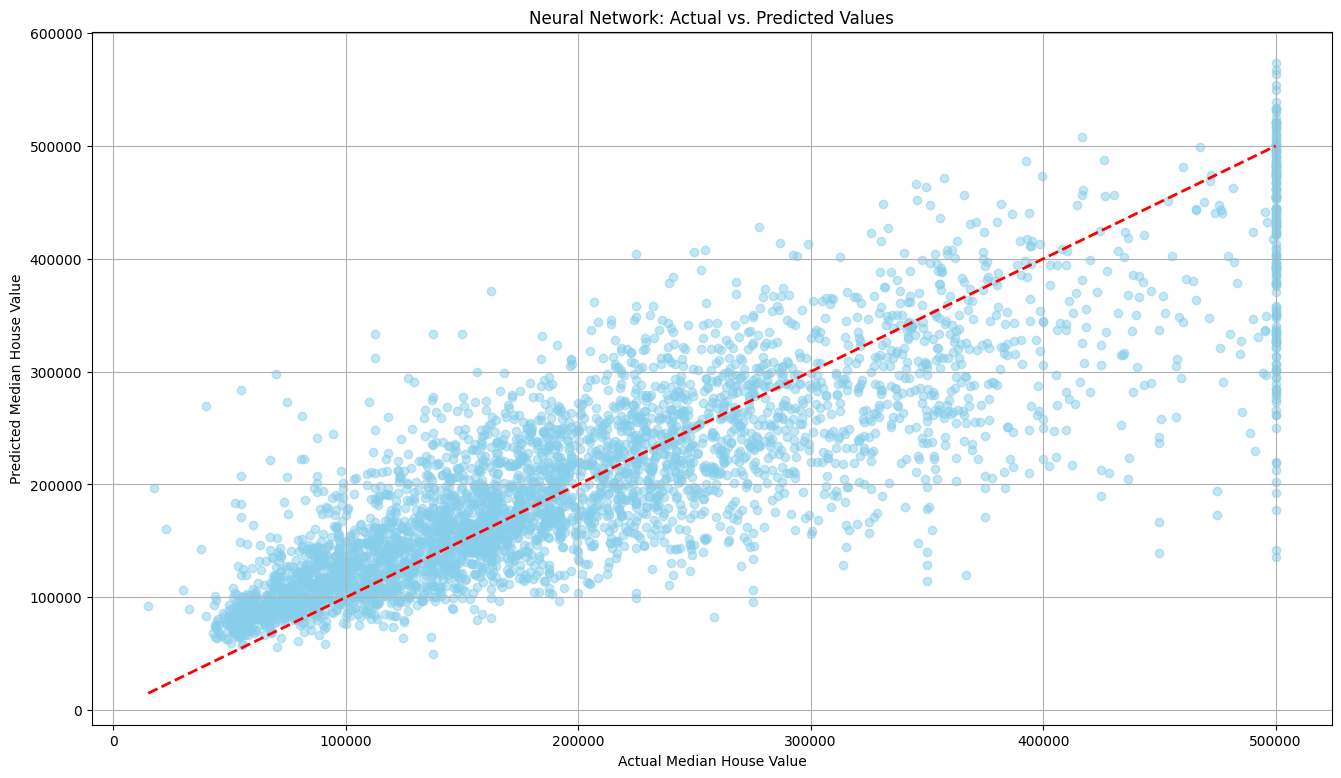

In [20]:
y_val_pred = medium_nn.predict(X_val)

plt.figure(figsize=(16, 9))
plt.scatter(y_val, y_val_pred, alpha=0.5, color='skyblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color='red', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Neural Network: Actual vs. Predicted Values')
plt.grid(True)
plt.show()

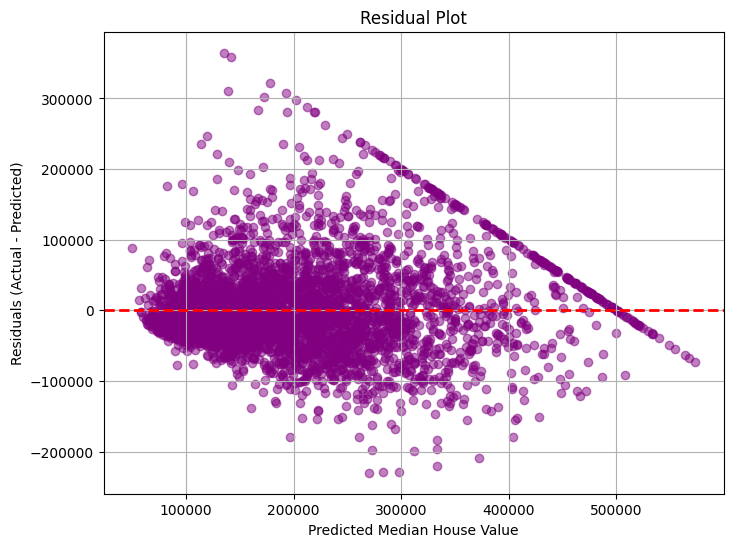

In [21]:
residuals = y_val - y_val_pred.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

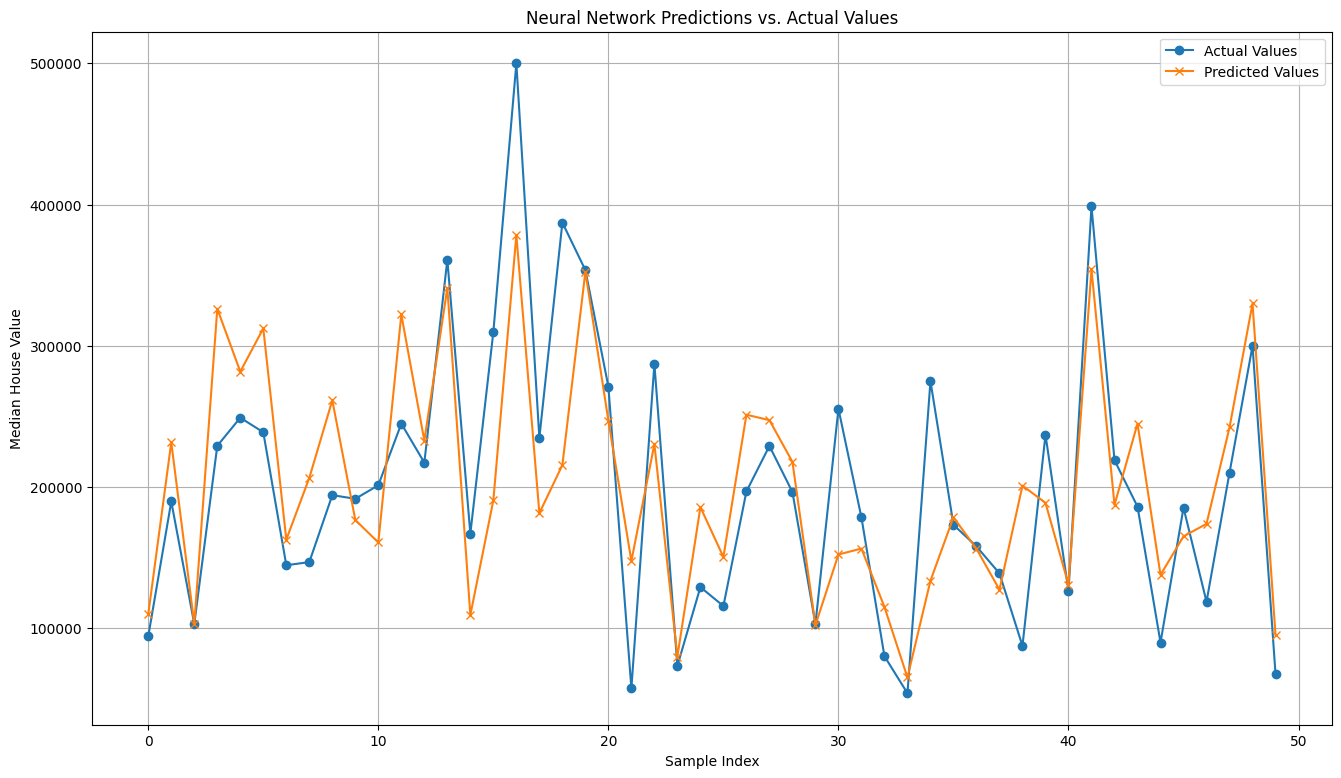

In [22]:
import numpy as np

# Random sample indices
sample_indices = np.random.choice(len(X_val), size=50, replace=False)

# Plot actual vs predicted for samples
plt.figure(figsize=(16, 9))
plt.plot(range(50), y_val.iloc[sample_indices], label='Actual Values', marker='o')
plt.plot(range(50), y_val_pred[sample_indices], label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.title('Neural Network Predictions vs. Actual Values')
plt.legend()
plt.grid(True)

In [10]:
large_nn = Sequential(
    [
        Input(shape=(12,)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        # Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ]
)

optimizer = Adam(learning_rate=0.1)
cp = ModelCheckpoint('models/large_nn.keras', save_best_only=True)
large_nn.compile(optimizer=optimizer, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 26433175552.0000 - root_mean_squared_error: 160435.2031 - val_loss: 10273703936.0000 - val_root_mean_squared_error: 101359.2812
Epoch 2/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10150651904.0000 - root_mean_squared_error: 100734.0547 - val_loss: 7757383168.0000 - val_root_mean_squared_error: 88076.0078
Epoch 3/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10701068288.0000 - root_mean_squared_error: 103236.1016 - val_loss: 12659579904.0000 - val_root_mean_squared_error: 112514.7969
Epoch 4/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8595082240.0000 - root_mean_squared_error: 92615.0000 - val_loss: 11427513344.0000 - val_root_mean_squared_error: 106899.5469
Epoch 5/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7191569408.0000 - root_mean_squared_error: 84566.9531 - val_loss: 7640897536.0000 - val_root_mean_squared_error: 87412.2266
Epoch 6/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 67

In [24]:
large_nn = load_model('models/large_nn.keras')
# Below will return RMSE value as squared is false
root_mean_squared_error(large_nn.predict(X_train), y_train), root_mean_squared_error(large_nn.predict(X_val), y_val)

384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(67406.10606840745, 66309.40364785239)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\vedes\AppData\Local\Temp\ipykernel_37424\2691066903.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color='red', lw=2)


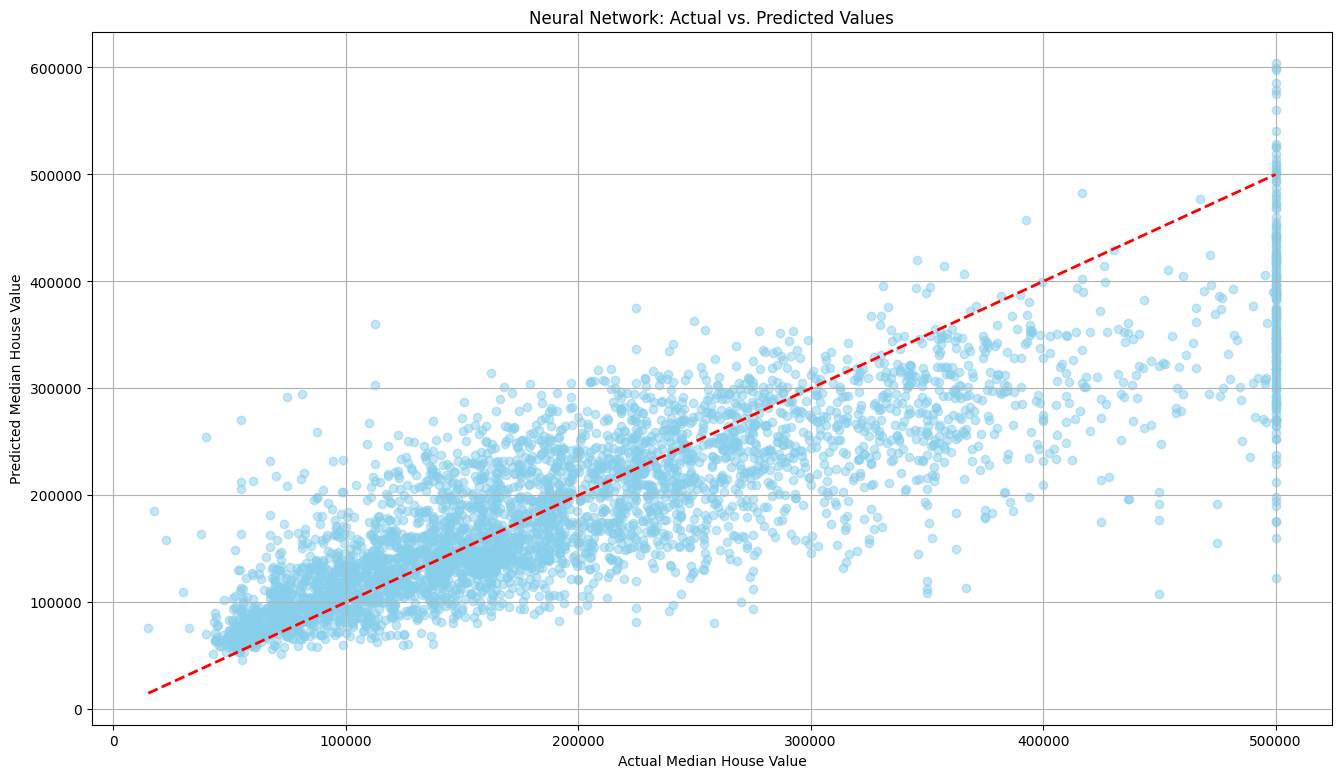

In [25]:
y_val_pred = large_nn.predict(X_val)

plt.figure(figsize=(16, 9))
plt.scatter(y_val, y_val_pred, alpha=0.5, color='skyblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', color='red', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Neural Network: Actual vs. Predicted Values')
plt.grid(True)
plt.show()

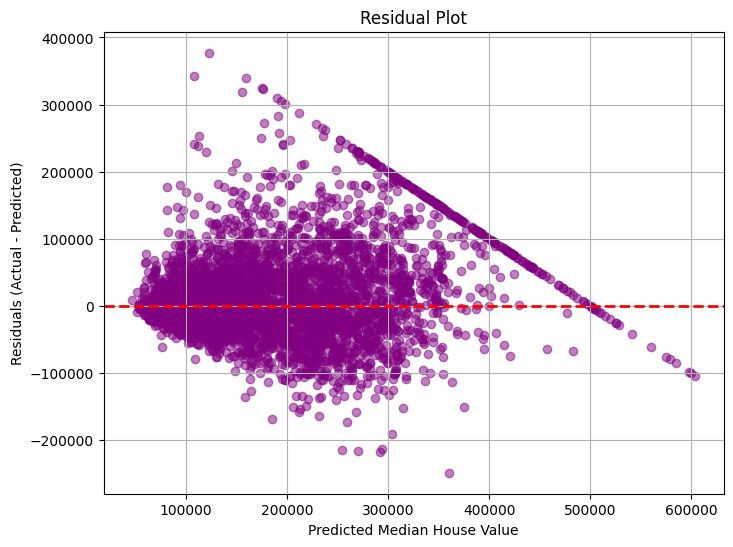

In [26]:
residuals = y_val - y_val_pred.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

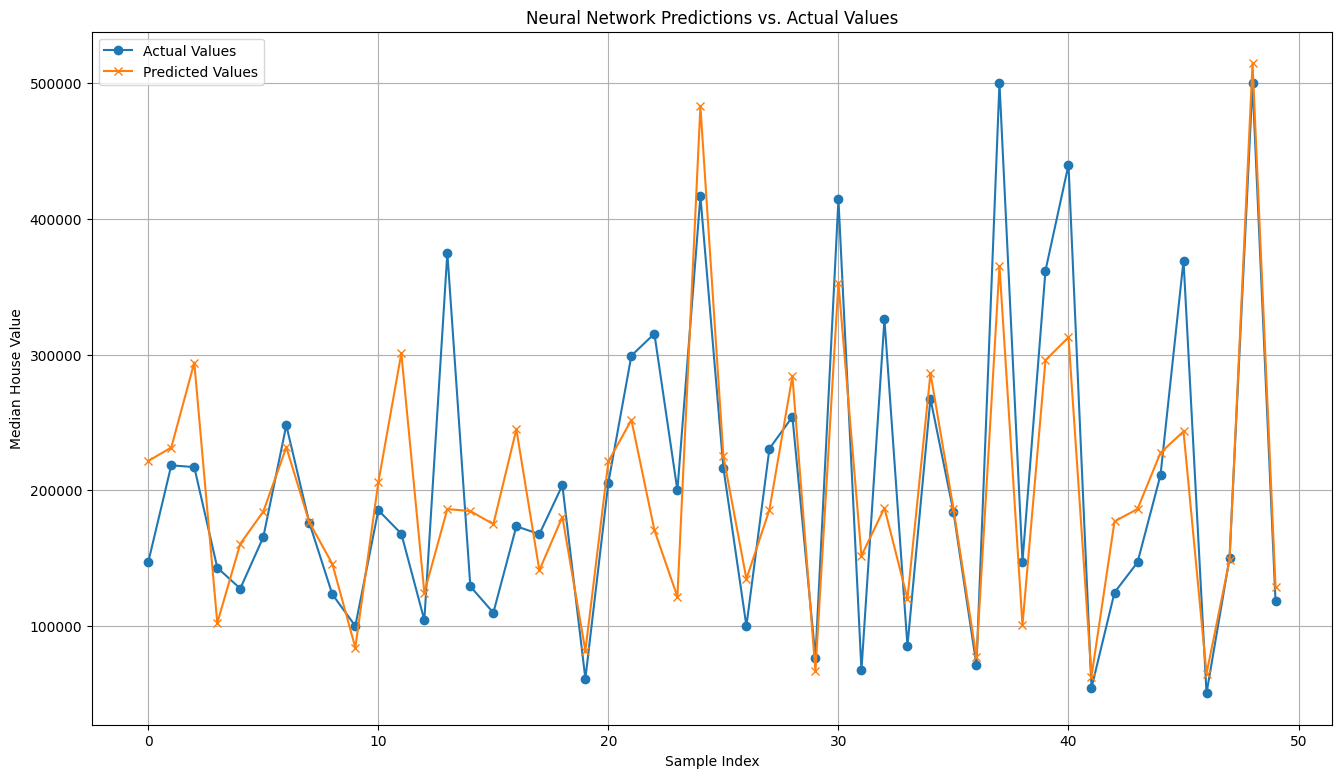

In [27]:
# Random sample indices
sample_indices = np.random.choice(len(X_val), size=50, replace=False)

# Plot actual vs predicted for samples
plt.figure(figsize=(16, 9))
plt.plot(range(50), y_val.iloc[sample_indices], label='Actual Values', marker='o')
plt.plot(range(50), y_val_pred[sample_indices], label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Median House Value')
plt.title('Neural Network Predictions vs. Actual Values')
plt.legend()
plt.grid(True)